In [1]:
from glob import glob
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import sys
sys.path.append('../')
from source_names_dict import source_names_readable, source_distances_mpc, get_simbad_name_glob
corr = __import__('11_corr')
from process_corr import load_df_fit_values, load_df_fit_samples
from uvot import filter_colors

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
import matplotlib.colors as mcolors
colors = ["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
        "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
        "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
        "#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
        "#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
        "#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
        "#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375"]



source_name_colors = {}

for i, simbad_name in enumerate(source_names_readable.keys()):
    source_name_colors[simbad_name] = colors[i]

In [4]:
def line(x, m, c):
    return m*x+c

def plot_bestfit(ax, fit_vals):
    xmin, xmax = ax.get_xlim()[0], ax.get_xlim()[1]
    xrange = np.linspace(xmin,xmax,100)
    ystds = np.array([line(x, fit_vals['m_mean'], fit_vals['c_std']) for x in xrange])
    m_mu = fit_vals['m_mean']
    c_mu = fit_vals['c_mean']
    y_est = line(xrange, m_mu, c_mu)

    ax.plot(xrange, y_est, color='cyan')
    ax.fill_between(xrange, y_est - ystds, y_est + ystds, alpha=0.25, color='grey', ec='#5a5a5a')
    ax.fill_between(xrange, y_est - 2*ystds, y_est + 2*ystds, alpha=0.25, color='grey', ec='#5a5a5a')
    ax.set_xlim(xmin, xmax)

In [5]:
df_fit_val = load_df_fit_values()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1159/1159 [00:33<00:00, 34.98it/s]


In [6]:
df_fit_samples = load_df_fit_samples()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1159/1159 [00:22<00:00, 51.93it/s]


In [7]:
df_fit_val_idx = df_fit_val.set_index(['simbad_name','xrt_curve','uvot_filter','include_bad', 'include_UL'])
df_fit_val_idx


r_mean  \
simbad_name                   xrt_curve uvot_filter include_bad include_UL             
Holmberg_II_X-1               FULL      U           False       False       0.072601   
                                                                True        0.242112   
                                                    True        False       0.073178   
                                                                True        0.242648   
                                        UVM2        False       False       0.059412   
...                                                                              ...   
[SST2011]_J141939.39+564137.8 FULL      UVM2        True        True        0.140920   
                              HARD      UVM2        False       False       0.049000   
                                                    True        False      -0.023205   
                              SOFT      UVM2        False       False      -0.034800   
                                                    True        False       0.200848   

                                                                               r_std  \
simbad_name                   xrt_curve uvot_filter include_bad include_UL             
Holmberg_II_X-1               FULL      U           False       False       0.043464   
                                                                True        0.049480   
                                                    True        False       0.043325   
                                                                True        0.048880   
                                        UVM2        False       False       0.091786   
...                                                                              ...   
[SST2011]_J141939.39+564137.8 FULL      UVM2        True        True        0.217337   
                              HARD      UVM2        False       False       0.998849   
                                                    True        False       0.230020   
                              SOFT      UVM2        False       False       0.999444   
                                                    True        False       0.256585   

                                                                               m_mean  \
simbad_name                   xrt_curve uvot_filter include_bad include_UL              
Holmberg_II_X-1               FULL      U           False       False        0.258043   
                                                                True         1.456759   
                                                    True        False        0.260076   
                                                                True         1.469303   
                                        UVM2        False       False        0.186595   
...                                                                               ...   
[SST2011]_J141939.39+564137.8 FULL      UVM2        True        True         1.002041   
                              HARD      UVM2        False       False      -60.289984   
                                                    True        False       -0.125867   
                              SOFT      UVM2        False       False       -3.303507   
                                                    True        False        1.936374   

                                                                                  m_std  \
simbad_name                   xrt_curve uvot_filter include_bad include_UL                
Holmberg_II_X-1               FULL      U           False       False          0.154851   
                                                                True           0.540213   
                                                    True        False          0.154127   
                                                                True           0.536720   
                                        UVM2        False       False          0.294

Holmberg_II_X-1 FULL U
Holmberg_II_X-1 FULL UVM2
Holmberg_II_X-1 FULL UVW1
Holmberg_II_X-1 FULL UVW2
M82_X-2 FULL B
M82_X-2 FULL U
M82_X-2 FULL UVM2
M82_X-2 FULL UVW1
M82_X-2 FULL UVW2
M82_X-2 FULL V
NAME_Holmberg_IX_X-1 FULL U
15 0
NAME_Holmberg_IX_X-1 FULL UVM2
NAME_Holmberg_IX_X-1 FULL UVW1
17 1
NAME_Holmberg_IX_X-1 FULL UVW2
NAME_IC_10_X-1 FULL U
NAME_NGC_1313_X-1 FULL U
NAME_NGC_1313_X-1 FULL UVM2
NAME_NGC_1313_X-1 FULL UVW1
25 2
NAME_NGC_1313_X-1 FULL UVW2
NAME_NGC_1313_X-2 FULL U
NAME_NGC_1313_X-2 FULL UVM2
NAME_NGC_1313_X-2 FULL UVW1
NAME_NGC_1313_X-2 FULL UVW2
NAME_NGC_300_ULX1 FULL B
37 3
NAME_NGC_300_ULX1 FULL V
42 4
NAME_NGC_7793_P13 FULL U
NAME_NGC_925_ULX-1 FULL UVM2
NAME_NGC_925_ULX-1 FULL UVW1
NAME_NGC_925_ULX-1 FULL UVW2
57 5
NOVA_Cyg_1989 FULL U
RX_J133001+47137 FULL B
RX_J133001+47137 FULL U
RX_J133001+47137 FULL UVM2
73 6
RX_J133001+47137 FULL UVW2
75 7
RX_J133001+47137 FULL V
SWIFT_J0243.6+6124 FULL B
SWIFT_J0243.6+6124 FULL UVM2
SWIFT_J0243.6+6124 FULL V
[LB2005]_

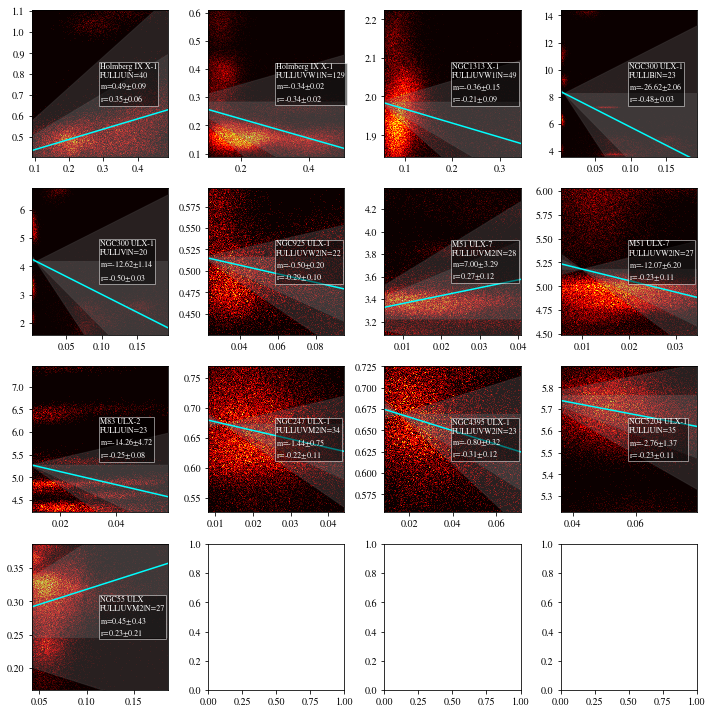

In [15]:
xrt_band = 'FULL'

fig, axes = plt.subplots(4,4,figsize=(10,10),facecolor='white')
ax = axes.flatten()

j = 0

for i, fn in enumerate(glob('../lightcurves/joined/*nosys*.fits')):
    tab = Table.read(fn)
    tables           = corr.calc_subsets(tab)
    tab_5_sig        = tables['tab_5_sig']
    tab_UL           = tables['tab_UL']
    tab_no_UL        = tables['tab_no_UL']
    tab_BAD          = tables['tab_BAD']
    tab_no_BAD       = tables['tab_no_BAD']
    tab_UL_no_bad    = tables['tab_UL_no_bad']
    tab_no_UL_no_bad = tables['tab_no_UL_no_bad']
    
    N = len(tab_no_UL_no_bad)
    
    if N<20:
        continue

    sp = fn.split('/')[-1][:-5].split(',')
    simbad_name = sp[0]
    uvot_band   = sp[1]
    lc_type     = sp[2]
    
    print(simbad_name, xrt_band, uvot_band)
    fit_vals = df_fit_val_idx.loc[simbad_name, xrt_band, uvot_band, 'False', 'False']

    if (fit_vals['r_mean'] > -0.2) and (fit_vals['r_mean'] < 0.2):
        continue
    if tab_no_UL_no_bad['Rate'].max() > 3:
        continue
    
    readable_name = source_names_readable[simbad_name]

    x = tab_no_UL_no_bad['Rate']
    y = tab_no_UL_no_bad['COI_SRC_RATE']
    x_err = 2*tab_no_UL_no_bad['Ratepos']
    y_err = tab_no_UL_no_bad['COI_SRC_RATE_ERR']

    x_samp = np.random.normal(loc=x, scale=x_err, size=(10000,len(x))).flatten()
    y_samp = np.random.normal(loc=y, scale=y_err, size=(10000,len(y))).flatten()


    ax[j].hist2d(x_samp, y_samp, bins=1000, cmap='hot')
    
    #ax[j].set_xlabel(f'{xrt_band}')
    #ax[j].set_ylabel(f'{uvot_band}')
    ax[j].text(0.5, 0.5,f'{readable_name}\n{xrt_band}|{uvot_band}|N={N}\nm={fit_vals["m_mean"]:.2f}$\pm${fit_vals["m_std"]:.2f}\nr={fit_vals["r_mean"]:.2f}$\pm${fit_vals["r_std"]:.2f}',color='white',
               horizontalalignment='left',verticalalignment='center',transform = ax[j].transAxes,
               size = 8, 
               bbox=dict(facecolor='black', edgecolor='white', pad=1, alpha=0.5))
    
    ax[j].set_xlim(min(x),max(x))
    ax[j].set_ylim(min(y),max(y))

    
    plot_bestfit(ax[j], fit_vals)

    
    print(i,j)
    j+=1
    if j == 16:
        break
#plt.subplots_adjust
plt.tight_layout()
plt.show()
    

In [ ]:
for simbad_name in df_fit_samples['simbad_name'].unique():
    readable_name  = source_names_readable[simbad_name]
    
    df_src         = df_fit_samples[df_fit_samples['simbad_name'] == simbad_name]
    df_src_FULL    = df_src[df_src['xrt_curve'] == 'FULL']
    df_src_FULL_FF = df_src_FULL[(df_src_FULL['include_bad'] == 'False') & (df_src_FULL['include_UL'] == 'False')]
    df_src_FULL_TT = df_src_FULL[(df_src_FULL['include_bad'] == 'True') & (df_src_FULL['include_UL'] == 'True')]
    df_src_FULL_TF = df_src_FULL[(df_src_FULL['include_bad'] == 'True') & (df_src_FULL['include_UL'] == 'False')]
    df_src_FULL_FT = df_src_FULL[(df_src_FULL['include_bad'] == 'False') & (df_src_FULL['include_UL'] == 'True')]


    fig, axes = plt.subplots(2,2,figsize=(10,5), facecolor='white')
    ax = axes.flatten()

    title = ['bad=false, ul=false', 'bad=true, ul=true', 'bad=true, ul=false', 'bad=false, ul=true']
    for i, df in enumerate([df_src_FULL_FF,df_src_FULL_TT,df_src_FULL_TF,df_src_FULL_FT]):
        for uvot_filter in df['uvot_filter'].unique():
            df_sub = df[df['uvot_filter'] == uvot_filter]
            df_sub['r'].hist(bins=30, color=filter_colors[uvot_filter], ax=ax[i], histtype='step', label=uvot_filter, grid=False)

            assert len(df_sub) == 10000
            ax[i].set_title(title[i])
            ax[i].legend()
            ax[i].set_xlim(-1,1)

    plt.suptitle(f'{readable_name}')
    plt.legend()
    plt.show()

In [ ]:
for simbad_name in df_fit_samples['simbad_name'].unique():
    readable_name  = source_names_readable[simbad_name]
    xrt_band = 'HARD'
    df_src         = df_fit_samples[df_fit_samples['simbad_name'] == simbad_name]
    df_src_BAND    = df_src[df_src['xrt_curve'] == xrt_band]
    df_src_BAND_FF = df_src_BAND[(df_src_BAND['include_bad'] == 'False') & (df_src_BAND['include_UL'] == 'False')]
    df_src_BAND_TF = df_src_BAND[(df_src_BAND['include_bad'] == 'True') & (df_src_BAND['include_UL'] == 'False')]


    fig, ax = plt.subplots(1,2,figsize=(7,3.5), facecolor='white')
    
    title = ['bad=false', 'bad=true',]
    for i, df in enumerate([df_src_BAND_FF,df_src_BAND_TF]):
        ax[i].axvline(0, color='grey', lw=1.0)
        
        filters_sorted = [f for f in ['V','B','U','UVW1','UVM2','UVW2'] if f in df['uvot_filter'].unique()]

        for uvot_filter in filters_sorted:
            df_sub = df[df['uvot_filter'] == uvot_filter]
            df_sub['r'].hist(bins=30, color=filter_colors[uvot_filter], ax=ax[i], histtype='step', label=uvot_filter, grid=False)

            assert len(df_sub) == 10000
            ax[i].set_title(title[i])
            ax[i].legend()
            ax[i].set_xlim(-1,1)
            

    plt.suptitle(f'{readable_name}')
    plt.legend()
    plt.savefig(f'../figures/r_distributions/{readable_name}_{xrt_band}_r.pdf')
    plt.savefig(f'../figures/r_distributions/{readable_name}_{xrt_band}_r.png')
    
    plt.show()

NGC300 ULX-1                            -0.0619	0.0282	2.1981
NGC300 ULX-1                            -0.0615	0.0285	2.1533
V404Cyg                                 0.4322	0.0063	68.0666
V404Cyg                                 0.4421	0.0063	70.6527
SS433                                   0.2801	0.0281	9.9825
SS433                                   0.2807	0.0277	10.1228
Swift J0243.6+6124                      0.8203	0.0257	31.9682
Swift J0243.6+6124                      0.7850	0.0278	28.2629


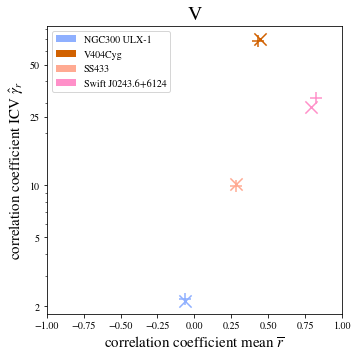

NGC300 ULX-1                            -0.0571	0.0214	2.6647
NGC300 ULX-1                            -0.0572	0.0211	2.7084
V404Cyg                                 0.5265	0.0065	81.0422
V404Cyg                                 0.5352	0.0064	83.6761
SS433                                   0.2318	0.0448	5.1699
SS433                                   0.2326	0.0440	5.2918
Swift J0243.6+6124                      0.7528	0.0246	30.5445
Swift J0243.6+6124                      0.7458	0.0248	30.1249


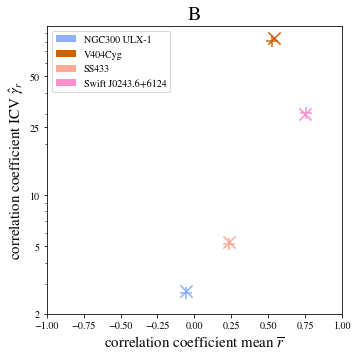

M82 X-2                                 -0.1653	0.0554	2.9840
M82 X-2                                 -0.1651	0.0556	2.9705
Holmberg IX X-1                         0.2861	0.0619	4.6230
Holmberg IX X-1                         0.2865	0.0615	4.6556
M83 ULX-1                               0.1915	0.0753	2.5424
M83 ULX-1                               -0.1764	0.0481	3.6676
NGC1313 X-1                             -0.1296	0.0251	5.1589
NGC1313 X-1                             -0.1279	0.0263	4.8673
NGC300 ULX-1                            0.2824	0.0418	6.7586
NGC300 ULX-1                            0.2820	0.0416	6.7785
NGC5907 ULX                             0.1697	0.0681	2.4925
NGC7793 P13                             -0.1744	0.0468	3.7235
V404Cyg                                 0.5030	0.0130	38.6416
V404Cyg                                 0.5083	0.0127	39.9546
SMC X-3                                 0.6379	0.0321	19.8530
SMC X-3                                 0.4351	0.0369	11.7834
SS433         

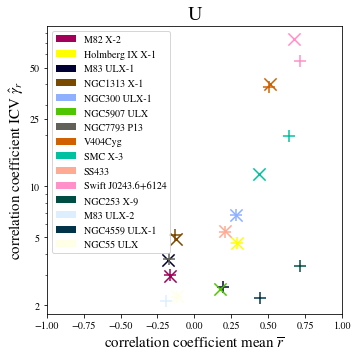

Holmberg II X-1                         -0.1880	0.0513	3.6638
Holmberg II X-1                         -0.1886	0.0516	3.6535
Holmberg IX X-1                         -0.3155	0.0230	13.7026
Holmberg IX X-1                         -0.3152	0.0231	13.6697
NGC1313 X-1                             -0.2288	0.0847	2.7011
NGC1313 X-1                             -0.2273	0.0832	2.7322
NGC300 ULX-1                            0.4640	0.0396	11.7166
NGC300 ULX-1                            0.4636	0.0396	11.6961
NGC7793 P13                             -0.4465	0.1263	3.5346
NGC7793 P13                             -0.2273	0.1052	2.1617
V404Cyg                                 0.8139	0.0110	73.7702
V404Cyg                                 0.8182	0.0107	76.5931
SMC X-3                                 -0.8066	0.0582	13.8612
SMC X-3                                 -0.5619	0.0413	13.5911
SS433                                   0.2294	0.1125	2.0385
Swift J0243.6+6124                      0.9117	0.0243	37.4718
Swift

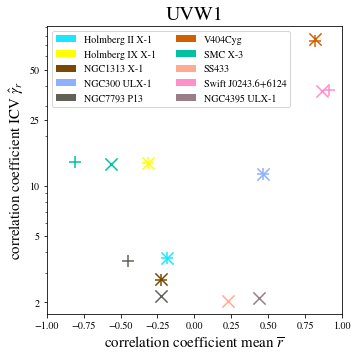

Holmberg IX X-1                         -0.1834	0.0739	2.4812
Holmberg IX X-1                         -0.1843	0.0735	2.5069
M83 ULX-1                               0.4726	0.2301	2.0536
NGC300 ULX-1                            0.5668	0.0748	7.5803
NGC300 ULX-1                            0.5668	0.0743	7.6243
NGC5907 ULX                             0.3514	0.1725	2.0365
NGC7793 P13                             -0.2428	0.1097	2.2131
UGC6456 ULX                             -0.3439	0.1383	2.4859
SMC X-3                                 0.7139	0.0896	7.9695
Swift J0243.6+6124                      0.6359	0.0682	9.3251
Swift J0243.6+6124                      0.6379	0.0655	9.7320
M81 X-6                                 0.2449	0.1218	2.0115
NGC4559 ULX-1                           -0.3420	0.1377	2.4831
NGC5408 ULX-1                           -0.1293	0.0617	2.0963
NGC5408 ULX-1                           -0.1563	0.0643	2.4317


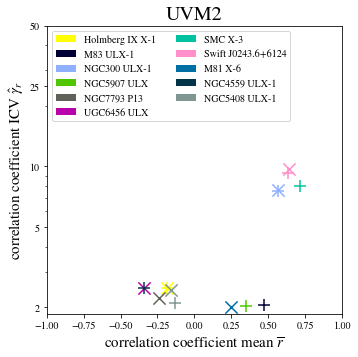

Holmberg II X-1                         -0.1759	0.0503	3.4984
Holmberg II X-1                         -0.1741	0.0557	3.1262
NGC300 ULX-1                            0.6354	0.0320	19.8863
NGC300 ULX-1                            0.6350	0.0321	19.7906
NGC7793 P13                             0.5797	0.1550	3.7400
NGC7793 P13                             -0.3560	0.0704	5.0604
NGC925 ULX-1                            -0.2562	0.1122	2.2844
V404Cyg                                 0.2771	0.0407	6.8028
V404Cyg                                 0.2775	0.0408	6.8079
Swift J0243.6+6124                      -0.8594	0.0254	33.8618
Swift J0243.6+6124                      -0.5693	0.0319	17.8292
M81 X-6                                 -0.1007	0.0436	2.3120
M81 X-6                                 -0.1057	0.0494	2.1385
NGC4395 ULX-1                           -0.4006	0.1093	3.6634


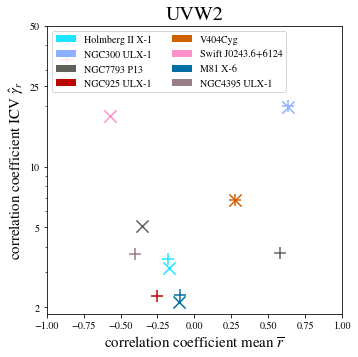

V404Cyg                                 0.3620	0.1554	2.3289
V404Cyg                                 0.3687	0.1566	2.3551


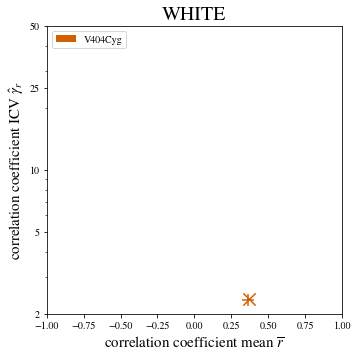

In [127]:
for uvot_filter in ['V','B','U','UVW1','UVM2','UVW2','WHITE']:
    names_to_plot = []
    fig, ax = plt.subplots(1,1,figsize=(5.3,5.3), facecolor='white')
    ax.set_title(f'{uvot_filter}', size=20)
    ax.set_xlabel(r'correlation coefficient mean $\overline{r}$', size=15)
    ax.set_ylabel(r'correlation coefficient ICV $\hat{\gamma}_{r}$', size=15)
    
    ax.set_xlim(-1,1)
    
    sub1 = df_fit_samples[df_fit_samples['uvot_filter'] == uvot_filter]
    
    for simbad_name in sub1['simbad_name'].unique():
        readable_name  = source_names_readable[simbad_name]
        sub2 = sub1[sub1['simbad_name'] == simbad_name]
        for xrt_band in ['HARD']:
            sub3   = sub2[sub2['xrt_curve'] == xrt_band]
            sub_FF = sub3[(sub3['include_bad'] == 'False') & (sub3['include_UL'] == 'False')]
            sub_TF = sub3[(sub3['include_bad'] == 'True') & (sub3['include_UL'] == 'False')]

        
            title = ['bad=false', 'bad=true']

            markers = {'FULL_FF': '+',
                       'SOFT_FF': r'$\mathrm{S}$',
                       'HARD_FF': '+',
                       'FULL_TF': r'$\mathrm{\overline{F}}$',
                       'SOFT_TF': r'$\mathrm{\overline{S}}$',
                       'HARD_TF': 'x'}
            pars = ['FF','TF']
            for i, df in enumerate([sub_FF,sub_TF]):
                marker = markers[f'{xrt_band}_{pars[i]}']
                r        = df['r'].mean()
                r_std    = df['r'].std()
                r_nsig   = abs(r / r_std)

                if (r_nsig < 2) or np.isnan(r_nsig):
                    continue
                else:
                    ax.scatter(r, r_nsig, marker=marker, color=source_name_colors[simbad_name], s=150)
                    names_to_plot.append(simbad_name)
                    print(f'{readable_name:<40}{r:.4f}\t{r_std:.4f}\t{r_nsig:.4f}')

            
    ax.set_yscale('log')
    ax.set_yticks([2,5,10,25,50], labels=[2,5,10,25,50])
    
    
    names_to_plot = list(dict.fromkeys(names_to_plot))
    legend_elements = [Patch(facecolor=source_name_colors[simbad_name], label=source_names_readable[simbad_name]) for simbad_name in names_to_plot]
    
    
    if uvot_filter in ['UVW1','UVM2','UVW2']:
        ax.legend(handles=legend_elements, ncol=2, loc='upper left')
    else:
        ax.legend(handles=legend_elements, ncol=1, loc='upper left')
        
    plt.savefig(f'../figures/r_vs_r_sig/{uvot_filter}.pdf', bbox_inches='tight')
    plt.savefig(f'../figures/r_vs_r_sig/{uvot_filter}.png', bbox_inches='tight')
    plt.show()

In [157]:
# For each source, Plot r vs r_sig for each band

Holmberg_II_X-1
Holmberg II X-1                         U                             0.0205	0.0501	0.410210000
Holmberg II X-1                         U                             0.0206	0.0492	0.419610000
Holmberg II X-1                         UVW1                          -0.1880	0.0513	3.663810000
Holmberg II X-1                         UVW1                          -0.1886	0.0516	3.653510000
Holmberg II X-1                         UVM2                          -0.0713	0.1242	0.573910000
Holmberg II X-1                         UVM2                          -0.0983	0.1300	0.756310000
Holmberg II X-1                         UVW2                          -0.1759	0.0503	3.498410000
Holmberg II X-1                         UVW2                          -0.1741	0.0557	3.126210000


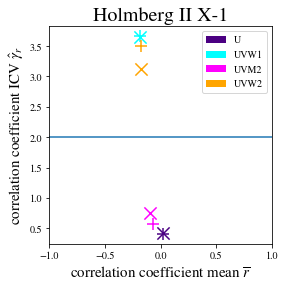

M31_ULX-1
M31 ULX-1                               UVW1                          0.1084	0.9942	0.109010000
M31 ULX-1                               UVW1                          0.0595	0.0855	0.695510000
M31 ULX-1                               UVM2                          0.3256	0.4064	0.801110000
M31 ULX-1                               UVW2                          0.0046	0.1634	0.028010000


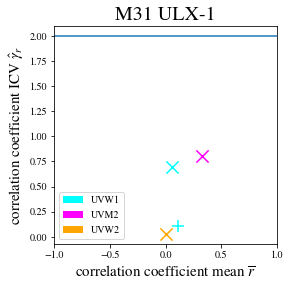

M82_X-2
M82 X-2                                 V                             -0.0024	0.1202	0.020210000
M82 X-2                                 V                             -0.0017	0.1190	0.014210000
M82 X-2                                 B                             0.0004	0.1206	0.003110000
M82 X-2                                 B                             -0.0003	0.1170	0.002810000
M82 X-2                                 U                             -0.1653	0.0554	2.984010000
M82 X-2                                 U                             -0.1651	0.0556	2.970510000
M82 X-2                                 UVW1                          -0.0062	0.0610	0.102410000
M82 X-2                                 UVW1                          -0.0069	0.0603	0.114710000
M82 X-2                                 UVM2                          -0.1257	0.0678	1.854310000
M82 X-2                                 UVM2                          -0.1259	0.0673	1.870510000
M82 X-2                

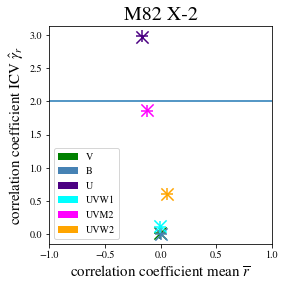

NAME_Holmberg_IX_X-1
Holmberg IX X-1                         B                             -0.0996	0.2050	0.486110000
Holmberg IX X-1                         B                             -0.1038	0.2061	0.503810000
Holmberg IX X-1                         U                             0.2861	0.0619	4.623010000
Holmberg IX X-1                         U                             0.2865	0.0615	4.655610000
Holmberg IX X-1                         UVW1                          -0.3155	0.0230	13.702610000
Holmberg IX X-1                         UVW1                          -0.3152	0.0231	13.669710000
Holmberg IX X-1                         UVM2                          -0.1834	0.0739	2.481210000
Holmberg IX X-1                         UVM2                          -0.1843	0.0735	2.506910000
Holmberg IX X-1                         UVW2                          -0.0352	0.0310	1.133710000
Holmberg IX X-1                         UVW2                          -0.0250	0.0356	0.703810000


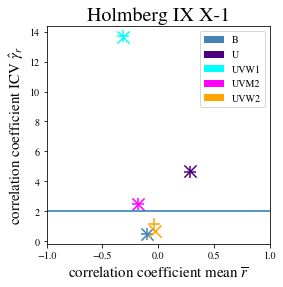

NAME_IC_10_X-1
IC10 X-1                                U                             0.0093	0.0731	0.127110000
IC10 X-1                                U                             0.0080	0.0674	0.119410000


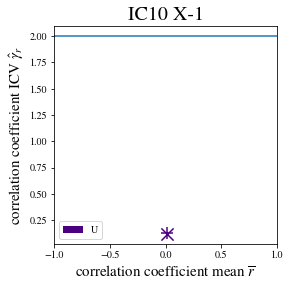

NAME_M83_ULX-1
M83 ULX-1                               U                             0.1915	0.0753	2.542410000
M83 ULX-1                               U                             -0.1764	0.0481	3.667610000
M83 ULX-1                               UVW1                          0.2338	0.4657	0.502110000
M83 ULX-1                               UVW1                          0.2846	0.2089	1.362610000
M83 ULX-1                               UVM2                          0.4726	0.2301	2.053610000
M83 ULX-1                               UVM2                          0.0638	0.1200	0.532210000


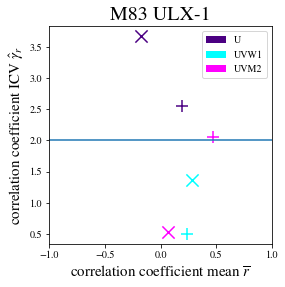

NAME_NGC_1313_X-1
NGC1313 X-1                             U                             -0.1296	0.0251	5.158910000
NGC1313 X-1                             U                             -0.1279	0.0263	4.867310000
NGC1313 X-1                             UVW1                          -0.2288	0.0847	2.701110000
NGC1313 X-1                             UVW1                          -0.2273	0.0832	2.732210000
NGC1313 X-1                             UVM2                          -0.1057	0.0855	1.235910000
NGC1313 X-1                             UVM2                          -0.1076	0.0869	1.238210000
NGC1313 X-1                             UVW2                          -0.0685	0.0687	0.998110000
NGC1313 X-1                             UVW2                          -0.0676	0.0688	0.982910000


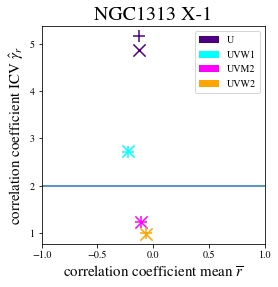

NAME_NGC_1313_X-2
NGC1313 X-2                             U                             -0.0261	0.0392	0.666310000
NGC1313 X-2                             U                             0.0029	0.0375	0.078010000
NGC1313 X-2                             UVW1                          -0.1216	0.1048	1.160010000
NGC1313 X-2                             UVW1                          -0.0007	0.0937	0.007610000
NGC1313 X-2                             UVM2                          0.0454	0.0713	0.636710000
NGC1313 X-2                             UVM2                          0.0564	0.0722	0.781710000
NGC1313 X-2                             UVW2                          -0.0551	0.0788	0.698710000
NGC1313 X-2                             UVW2                          -0.0531	0.0773	0.686710000


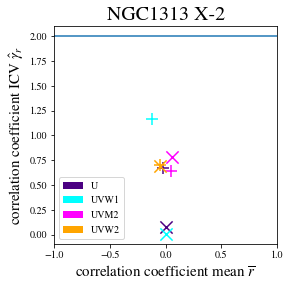

NAME_NGC_1365-X1
NGC1365 X-1                             V                             -0.3619	0.3979	0.909510000
NGC1365 X-1                             B                             -0.4375	0.4325	1.011710000
NGC1365 X-1                             U                             -0.0368	0.1817	0.202610000
NGC1365 X-1                             UVW1                          -0.1496	0.3647	0.410110000
NGC1365 X-1                             UVM2                          -0.0115	0.0963	0.119810000


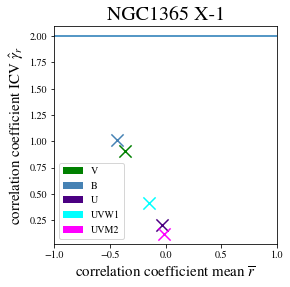

NAME_NGC_300_ULX1
NGC300 ULX-1                            V                             -0.0619	0.0282	2.198110000
NGC300 ULX-1                            V                             -0.0615	0.0285	2.153310000
NGC300 ULX-1                            B                             -0.0571	0.0214	2.664710000
NGC300 ULX-1                            B                             -0.0572	0.0211	2.708410000
NGC300 ULX-1                            U                             0.2824	0.0418	6.758610000
NGC300 ULX-1                            U                             0.2820	0.0416	6.778510000
NGC300 ULX-1                            UVW1                          0.4640	0.0396	11.716610000
NGC300 ULX-1                            UVW1                          0.4636	0.0396	11.696110000
NGC300 ULX-1                            UVM2                          0.5668	0.0748	7.580310000
NGC300 ULX-1                            UVM2                          0.5668	0.0743	7.624310000
NGC300 ULX-1    

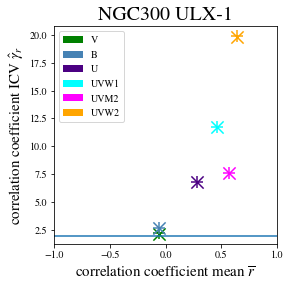

NAME_NGC_5907_ULX
NGC5907 ULX                             U                             0.3240	0.1936	1.673810000
NGC5907 ULX                             U                             0.1697	0.0681	2.492510000
NGC5907 ULX                             UVW1                          -0.0052	0.1819	0.028810000
NGC5907 ULX                             UVW1                          0.1547	0.0920	1.681310000
NGC5907 ULX                             UVM2                          0.3514	0.1725	2.036510000
NGC5907 ULX                             UVM2                          0.0063	0.0732	0.085710000
NGC5907 ULX                             UVW2                          -0.0748	0.1764	0.424010000
NGC5907 ULX                             UVW2                          0.0841	0.0714	1.177910000


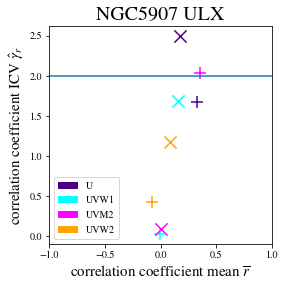

NAME_NGC_7090_ULX3
NGC7090 ULX-3                           U                             -0.3440	0.2478	1.388410000
NGC7090 ULX-3                           UVW1                          0.1954	0.2458	0.795310000
NGC7090 ULX-3                           UVM2                          0.0591	0.2255	0.262010000


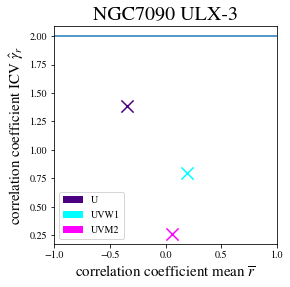

NAME_NGC_7793_P13
NGC7793 P13                             U                             -0.1744	0.0468	3.723510000
NGC7793 P13                             U                             -0.0437	0.0399	1.093910000
NGC7793 P13                             UVW1                          -0.4465	0.1263	3.534610000
NGC7793 P13                             UVW1                          -0.2273	0.1052	2.161710000
NGC7793 P13                             UVM2                          -0.0011	0.2013	0.005610000
NGC7793 P13                             UVM2                          -0.2428	0.1097	2.213110000
NGC7793 P13                             UVW2                          0.5797	0.1550	3.740010000
NGC7793 P13                             UVW2                          -0.3560	0.0704	5.060410000


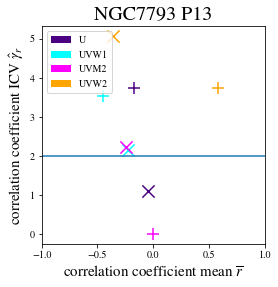

NAME_NGC_925_ULX-1
NGC925 ULX-1                            U                             -0.1503	0.1941	0.774510000
NGC925 ULX-1                            U                             -0.1505	0.1923	0.782910000
NGC925 ULX-1                            UVW1                          -0.0429	0.1082	0.396210000
NGC925 ULX-1                            UVW1                          -0.0652	0.1334	0.488810000
NGC925 ULX-1                            UVM2                          0.1276	0.1327	0.961310000
NGC925 ULX-1                            UVM2                          0.1268	0.1345	0.943010000
NGC925 ULX-1                            UVW2                          -0.2562	0.1122	2.284410000
NGC925 ULX-1                            UVW2                          -0.0335	0.1584	0.211210000


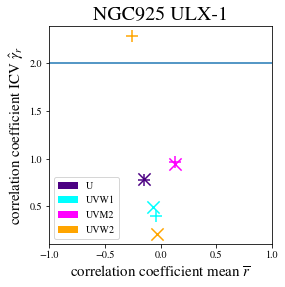

NAME_NGC_925_ULX-2
NGC925 ULX-2                            U                             0.1705	0.3342	0.510210000
NGC925 ULX-2                            U                             -0.0704	0.1756	0.400810000
NGC925 ULX-2                            UVW1                          -0.0117	0.3101	0.037610000
NGC925 ULX-2                            UVW1                          -0.1545	0.2114	0.731010000
NGC925 ULX-2                            UVM2                          0.2434	0.2001	1.216710000
NGC925 ULX-2                            UVM2                          0.1517	0.1545	0.981810000
NGC925 ULX-2                            UVW2                          0.0527	0.2695	0.195510000
NGC925 ULX-2                            UVW2                          -0.1730	0.1295	1.336110000


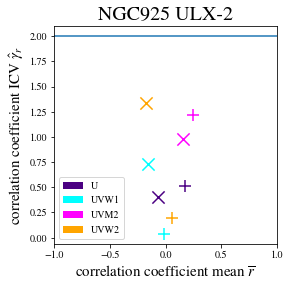

NAME_UGC_6456_ULX
UGC6456 ULX                             UVW1                          -0.2805	0.2247	1.248410000
UGC6456 ULX                             UVW1                          -0.0349	0.1804	0.193310000
UGC6456 ULX                             UVM2                          -0.3106	0.3961	0.784310000
UGC6456 ULX                             UVM2                          -0.3439	0.1383	2.485910000
UGC6456 ULX                             UVW2                          -0.3403	0.2616	1.300510000
UGC6456 ULX                             UVW2                          -0.0693	0.1275	0.543710000


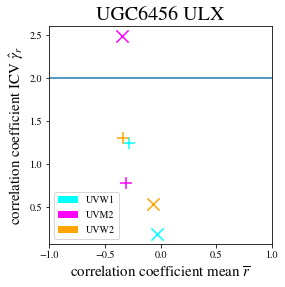

NOVA_Cyg_1989
V404Cyg                                 V                             0.4322	0.0063	68.066610000
V404Cyg                                 V                             0.4421	0.0063	70.652710000
V404Cyg                                 B                             0.5265	0.0065	81.042210000
V404Cyg                                 B                             0.5352	0.0064	83.676110000
V404Cyg                                 U                             0.5030	0.0130	38.641610000
V404Cyg                                 U                             0.5083	0.0127	39.954610000
V404Cyg                                 UVW1                          0.8139	0.0110	73.770210000
V404Cyg                                 UVW1                          0.8182	0.0107	76.593110000
V404Cyg                                 UVW2                          0.2771	0.0407	6.802810000
V404Cyg                                 UVW2                          0.2775	0.0408	6.807910000
V404Cyg           

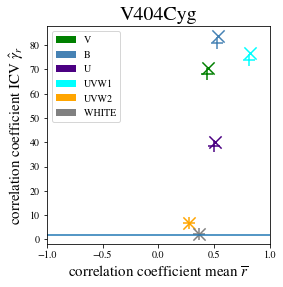

RX_J133001+47137
M51 ULX-7                               V                             -0.3810	0.9246	0.412110000
M51 ULX-7                               V                             -0.4026	0.9154	0.439810000
M51 ULX-7                               B                             -0.2247	0.6634	0.338710000
M51 ULX-7                               B                             -0.2207	0.6638	0.332410000
M51 ULX-7                               U                             -0.0188	0.1164	0.161710000
M51 ULX-7                               U                             -0.0206	0.0688	0.299310000
M51 ULX-7                               UVW1                          0.1431	0.1683	0.850610000
M51 ULX-7                               UVW1                          0.0279	0.1120	0.249510000
M51 ULX-7                               UVM2                          -0.1640	0.1264	1.297410000
M51 ULX-7                               UVM2                          0.1045	0.1185	0.881610000
M51 ULX-7       

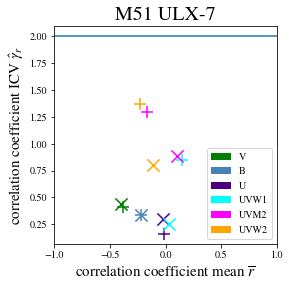

SMC_X-3
SMC X-3                                 U                             0.6379	0.0321	19.853010000
SMC X-3                                 U                             0.4351	0.0369	11.783410000
SMC X-3                                 UVW1                          -0.8066	0.0582	13.861210000
SMC X-3                                 UVW1                          -0.5619	0.0413	13.591110000
SMC X-3                                 UVM2                          0.7139	0.0896	7.969510000
SMC X-3                                 UVM2                          0.0494	0.0582	0.849510000


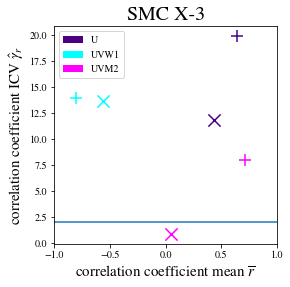

SS433
SS433                                   V                             0.2801	0.0281	9.982510000
SS433                                   V                             0.2807	0.0277	10.122810000
SS433                                   B                             0.2318	0.0448	5.169910000
SS433                                   B                             0.2326	0.0440	5.291810000
SS433                                   U                             0.2083	0.0390	5.347010000
SS433                                   U                             0.2085	0.0383	5.443210000
SS433                                   UVW1                          0.1618	0.1186	1.364510000
SS433                                   UVW1                          0.2294	0.1125	2.038510000
SS433                                   UVW2                          0.2810	0.1763	1.594010000
SS433                                   UVW2                          0.2840	0.1777	1.598110000


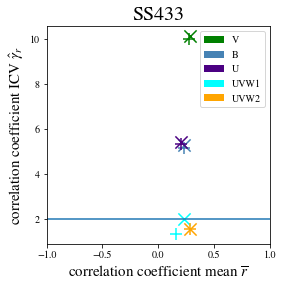

SWIFT_J0243.6+6124
Swift J0243.6+6124                      V                             0.8203	0.0257	31.968210000
Swift J0243.6+6124                      V                             0.7850	0.0278	28.262910000
Swift J0243.6+6124                      B                             0.7528	0.0246	30.544510000
Swift J0243.6+6124                      B                             0.7458	0.0248	30.124910000
Swift J0243.6+6124                      U                             0.7127	0.0130	54.816210000
Swift J0243.6+6124                      U                             0.6765	0.0091	74.199710000
Swift J0243.6+6124                      UVW1                          0.9117	0.0243	37.471810000
Swift J0243.6+6124                      UVW1                          0.8656	0.0232	37.238610000
Swift J0243.6+6124                      UVM2                          0.6359	0.0682	9.325110000
Swift J0243.6+6124                      UVM2                          0.6379	0.0655	9.732010000
Swift J0243.6

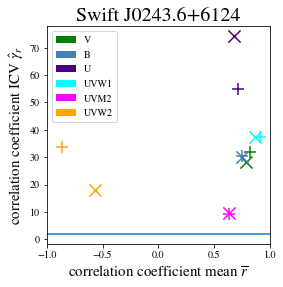

[LB2005]_NGC_253_X2
NGC253 X-2                              U                             0.0809	0.2429	0.332910000
NGC253 X-2                              U                             0.0056	0.2745	0.020310000


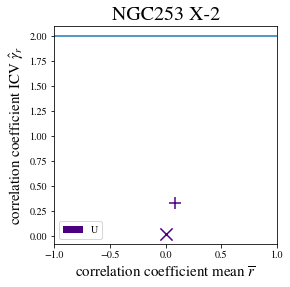

[LB2005]_NGC_253_X9
NGC253 X-9                              U                             0.7161	0.2123	3.373610000
NGC253 X-9                              U                             0.0095	0.2997	0.031710000


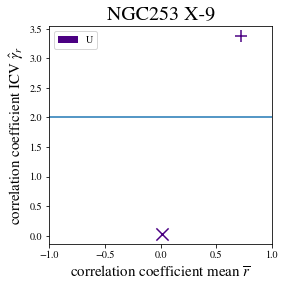

[LB2005]_NGC_5236_X11
M83 ULX-2                               U                             -0.1930	0.0910	2.121310000
M83 ULX-2                               U                             -0.1511	0.0788	1.917210000
M83 ULX-2                               UVW1                          -0.1119	0.1791	0.624710000
M83 ULX-2                               UVW1                          -0.1038	0.1762	0.589110000
M83 ULX-2                               UVM2                          -0.1693	0.1491	1.135010000
M83 ULX-2                               UVM2                          -0.1251	0.1383	0.904710000


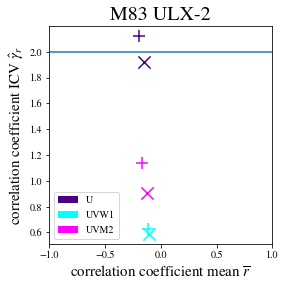

[LB2005]_NGC_6946_ULX1
NGC6946 ULX-1                           V                             0.0014	0.1037	0.013010000
NGC6946 ULX-1                           B                             0.0091	0.0841	0.107810000
NGC6946 ULX-1                           U                             0.0592	0.0934	0.633010000
NGC6946 ULX-1                           UVW1                          0.0090	0.0934	0.095910000
NGC6946 ULX-1                           UVM2                          -0.0538	0.1287	0.418010000
NGC6946 ULX-1                           UVW2                          -0.0069	0.0627	0.109410000


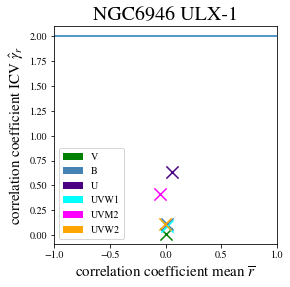

[LB2005]_NGC_6946_ULX3
NGC6946 ULX-3                           V                             -0.0023	0.0921	0.024710000
NGC6946 ULX-3                           V                             0.0019	0.0923	0.021010000
NGC6946 ULX-3                           B                             -0.0063	0.0905	0.069210000
NGC6946 ULX-3                           B                             -0.0375	0.0870	0.430610000
NGC6946 ULX-3                           U                             -0.0309	0.0954	0.323410000
NGC6946 ULX-3                           U                             -0.0262	0.0916	0.285910000
NGC6946 ULX-3                           UVW1                          0.0004	0.1020	0.003610000
NGC6946 ULX-3                           UVW1                          -0.0018	0.1004	0.017710000
NGC6946 ULX-3                           UVM2                          0.0225	0.1642	0.137210000
NGC6946 ULX-3                           UVM2                          -0.0064	0.1593	0.040310000
NGC6946 UL

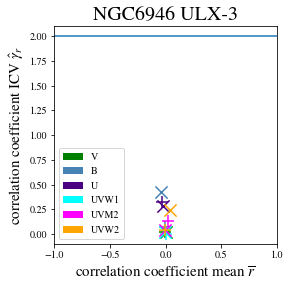

[LM2005]_NGC_247_ULX1
NGC247 ULX-1                            U                             -0.1520	0.1459	1.041710000
NGC247 ULX-1                            U                             -0.0607	0.1335	0.454910000
NGC247 ULX-1                            UVW1                          -0.1106	0.1388	0.796910000
NGC247 ULX-1                            UVW1                          -0.1089	0.1135	0.959410000
NGC247 ULX-1                            UVM2                          0.1229	0.1192	1.031110000
NGC247 ULX-1                            UVM2                          0.0323	0.0962	0.335710000
NGC247 ULX-1                            UVW2                          -0.3319	0.1722	1.928010000
NGC247 ULX-1                            UVW2                          -0.1306	0.2345	0.557010000


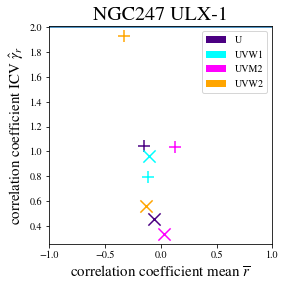

[LM2005]_NGC_3031_ULX1
M81 X-6                                 V                             -0.0462	0.0985	0.468910000
M81 X-6                                 V                             -0.0453	0.0977	0.463510000
M81 X-6                                 B                             0.0109	0.0966	0.113110000
M81 X-6                                 B                             0.0116	0.0981	0.118110000
M81 X-6                                 U                             -0.0524	0.1102	0.475710000
M81 X-6                                 U                             -0.0524	0.1115	0.469410000
M81 X-6                                 UVW1                          -0.0630	0.0657	0.958710000
M81 X-6                                 UVW1                          -0.0778	0.0725	1.073010000
M81 X-6                                 UVM2                          0.2439	0.1223	1.993810000
M81 X-6                                 UVM2                          0.2449	0.1218	2.011510000
M81 X-6    

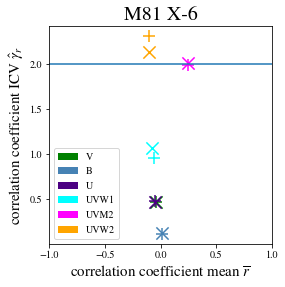

[LM2005]_NGC_4395_ULX1
NGC4395 ULX-1                           V                             0.0316	0.1074	0.294010000
NGC4395 ULX-1                           V                             0.0101	0.0911	0.110510000
NGC4395 ULX-1                           B                             -0.0143	0.1003	0.143010000
NGC4395 ULX-1                           B                             -0.0199	0.0812	0.245410000
NGC4395 ULX-1                           U                             -0.2199	0.3733	0.589210000
NGC4395 ULX-1                           U                             -0.1271	0.2558	0.496610000
NGC4395 ULX-1                           UVW1                          0.4198	0.2872	1.462010000
NGC4395 ULX-1                           UVW1                          0.4360	0.2072	2.104110000
NGC4395 ULX-1                           UVM2                          0.1682	0.3965	0.424310000
NGC4395 ULX-1                           UVM2                          -0.0193	0.1425	0.135510000
NGC4395 ULX-

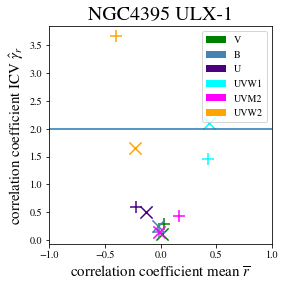

[LM2005]_NGC_4559_ULX1
NGC4559 ULX-1                           B                             -0.0148	0.9999	0.014810000
NGC4559 ULX-1                           B                             -0.0044	1.0000	0.004410000
NGC4559 ULX-1                           U                             0.4409	0.2018	2.184810000
NGC4559 ULX-1                           U                             0.3514	0.2200	1.597510000
NGC4559 ULX-1                           UVW1                          0.0645	0.1072	0.601210000
NGC4559 ULX-1                           UVW1                          0.0665	0.1057	0.629310000
NGC4559 ULX-1                           UVM2                          -0.3420	0.1377	2.483110000
NGC4559 ULX-1                           UVM2                          0.1379	0.1043	1.321310000
NGC4559 ULX-1                           UVW2                          0.1686	0.1160	1.453310000
NGC4559 ULX-1                           UVW2                          0.1083	0.1138	0.951910000


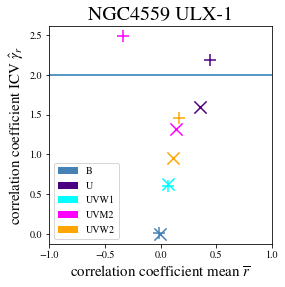

[LM2005]_NGC_5204_ULX1
NGC5204 ULX-1                           U                             -0.1972	0.1139	1.732010000
NGC5204 ULX-1                           U                             -0.1968	0.1131	1.740110000
NGC5204 ULX-1                           UVW1                          -0.1803	0.2621	0.687710000
NGC5204 ULX-1                           UVW1                          -0.1785	0.2611	0.683510000
NGC5204 ULX-1                           UVM2                          0.0266	0.2359	0.113010000
NGC5204 ULX-1                           UVM2                          -0.0278	0.2326	0.119410000
NGC5204 ULX-1                           UVW2                          -0.0892	0.2366	0.377110000
NGC5204 ULX-1                           UVW2                          -0.0877	0.2403	0.365010000


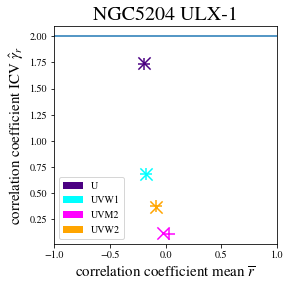

[LM2005]_NGC_5408_ULX1
NGC5408 ULX-1                           UVM2                          -0.1293	0.0617	2.096310000
NGC5408 ULX-1                           UVM2                          -0.1563	0.0643	2.431710000


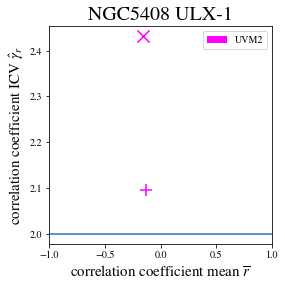

[SRW2006b]_NGC_55_ULX
NGC55 ULX                               U                             -0.1168	0.0524	2.228910000
NGC55 ULX                               U                             -0.1174	0.0522	2.250110000
NGC55 ULX                               UVW1                          -0.0231	0.0870	0.265710000
NGC55 ULX                               UVW1                          -0.0193	0.0866	0.223410000
NGC55 ULX                               UVM2                          0.2356	0.2355	1.000610000
NGC55 ULX                               UVM2                          0.2344	0.2329	1.006410000
NGC55 ULX                               UVW2                          -0.2499	0.1263	1.979110000
NGC55 ULX                               UVW2                          -0.2501	0.1270	1.969110000


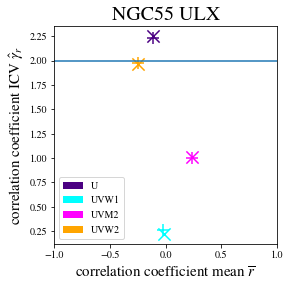

[SST2011]_J141939.39+564137.8
NGC5585 ULX                             UVM2                          0.0490	0.9988	0.049110000
NGC5585 ULX                             UVM2                          -0.0232	0.2300	0.100910000


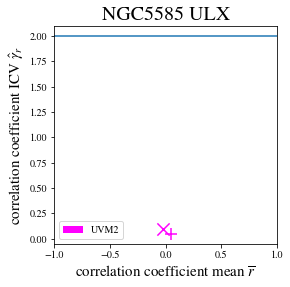

In [27]:
for simbad_name in df_fit_samples['simbad_name'].unique():
    filters_to_plot = []
    print(simbad_name)
    readable_name  = source_names_readable[simbad_name]
    fig, ax = plt.subplots(1,1,figsize=(4,4), facecolor='white')    
    
    ax.set_title(f'{readable_name}', size=20)
    ax.set_xlabel(r'correlation coefficient mean $\overline{r}$', size=15)
    ax.set_ylabel(r'correlation coefficient ICV $\hat{\gamma}_{r}$', size=15)
    ax.set_xlim(-1,1)
    
    sub1 = df_fit_samples[df_fit_samples['simbad_name'] == simbad_name]
    
    for uvot_filter in ['V','B','U','UVW1','UVM2','UVW2','WHITE']:
        sub2 = sub1[sub1['uvot_filter'] == uvot_filter]
        for xrt_band in ['HARD']:
            sub3   = sub2[sub2['xrt_curve'] == xrt_band]
            sub_FF = sub3[(sub3['include_bad'] == 'False') & (sub3['include_UL'] == 'False')]
            sub_TF = sub3[(sub3['include_bad'] == 'True') & (sub3['include_UL'] == 'False')]

            #assert len(sub_FF) == 10000
            #assert len(sub_TF) == 10000
            
            
            title = ['bad=false', 'bad=true']

            markers = {'FULL_FF': '+',
                       'SOFT_FF': r'$\mathrm{S}$',
                       'HARD_FF': '+',
                       'FULL_TF': r'$\mathrm{\overline{F}}$',
                       'SOFT_TF': r'$\mathrm{\overline{S}}$',
                       'HARD_TF': 'x'}

            pars = ['FF','TF']
            for i, df in enumerate([sub_FF, sub_TF]):
                marker = markers[f'{xrt_band}_{pars[i]}']
                r        = df['r'].mean()
                r_std    = df['r'].std()
                r_nsig   = abs(r / r_std)

                #if (r_nsig < 2) or np.isnan(r_nsig):
                #    continue
                #else:
                if np.isnan(r_nsig):
                    continue
                else:    
                    ax.scatter(r, r_nsig, marker=marker, color=filter_colors[uvot_filter], s=150)
                    print(f'{readable_name:<40}{uvot_filter:<30}{r:.4f}\t{r_std:.4f}\t{r_nsig:.4f}{len(sub_TF)}')
                    filters_to_plot.append(uvot_filter)

    #ax.set_yscale('log')
    #ax.set_yticks([2,5,10,25,50], labels=[2,5,10,25,50])


    #names_to_plot = list(dict.fromkeys(names_to_plot))
    #legend_elements = [Patch(facecolor=source_name_colors[simbad_name], label=source_names_readable[simbad_name]) for simbad_name in names_to_plot]


    filters_to_plot = list(set(filters_to_plot))
    filters_to_plot = sorted(filters_to_plot,key=['V','B','U','UVW1','UVM2','UVW2','WHITE'].index)
    legend_elements = [Patch(facecolor=filter_colors[f], label=f) for f in filters_to_plot]
    ax.legend(handles=legend_elements, ncol=1)
    
    ax.axhline(2)
    #ax.legend(ncol=1, loc='upper left')

    plt.savefig(f'../figures/r_vs_r_sig/source_plots/{readable_name}.pdf', bbox_inches='tight')
    plt.savefig(f'../figures/r_vs_r_sig/source_plots/{readable_name}.png', bbox_inches='tight')
    plt.show()

In [151]:
sub_TF

,r,m,c,simbad_name,xrt_curve,uvot_filter,include_bad,include_UL
0,0.450868,0.699830,36.261673,NOVA_Cyg_1989,HARD,WHITE,True,False
1,0.460309,1.008088,42.371934,NOVA_Cyg_1989,HARD,WHITE,True,False
2,0.234563,0.258430,27.181718,NOVA_Cyg_1989,HARD,WHITE,True,False
3,-0.128272,-0.229849,19.283544,NOVA_Cyg_1989,HARD,WHITE,True,False
4,0.348812,0.400179,30.769053,NOVA_Cyg_1989,HARD,WHITE,True,False
...,...,...,...,...,...,...,...,...
9995,0.443827,0.690533,36.879957,NOVA_Cyg_1989,HARD,WHITE,True,False
9996,0.462127,0.803915,38.304813,NOVA_Cyg_1989,HARD,WHITE,True,False
9997,0.454348,1.493009,49.199093,NOVA_Cyg_1989,HARD,WHITE,True,False
9998,0.419131,1.707760,57.561964,NOVA_Cyg_1989,HARD,WHITE,True,False


In [ ]:
HoII_FULL_FF

In [ ]:
tab = Table.read('../lightcurves/joined/NAME_NGC_7793_P13,U,curve_nosys_join.fits')
subsets = corr.calc_subsets(tab)
tab_no_UL_no_bad = subsets['tab_no_UL_no_bad']

x     = tab_no_UL_no_bad['Rate'].value
x_err = (tab_no_UL_no_bad['Ratepos'] - tab_no_UL_no_bad['Rateneg']).value
y     = tab_no_UL_no_bad['COI_SRC_RATE'].value
y_err = tab_no_UL_no_bad['COI_SRC_RATE_ERR'].value

In [ ]:
from scipy.stats import pearsonr

In [ ]:
Ndatas = np.arange(len(tab_no_UL_no_bad), 9, -10)
Ndatas
cmap = plt.cm.cool(Ndatas/max(Ndatas))

In [ ]:
plt.figure(figsize=(6,6), facecolor='white')
i = 0
while len(x) > 12:
    r = np.random.randint(len(x), size=10) # index to remove
    x = np.delete(x, r)
    x_err = np.delete(x_err, r)
    y = np.delete(y, r)
    y_err = np.delete(y_err, r)
    
    x_samp = np.random.normal(loc=x, scale=x_err, size=(10000,len(x)))
    y_samp = np.random.normal(loc=y, scale=y_err, size=(10000,len(y)))
    r_vals = [pearsonr(x_samp[i], y_samp[i])[0] for i in range(10000)]


    plt.hist(r_vals, bins=50, histtype='step', color=cmap[i])
    print(len(x))
    i+=1
plt.xlim(-1,1)
sm = plt.cm.ScalarMappable(cmap=plt.cm.cool, norm=plt.Normalize(vmin=min(Ndatas), vmax=max(Ndatas)))
plt.colorbar(sm, location='top', label=r'Number of Data points', pad=0.01)
plt.xlabel('r', size=15)
plt.axvline(0, color='grey', lw=1.0)
plt.savefig('../figures/removing_datapoints_r.png', bbox_inches='tight')
plt.savefig('../figures/removing_datapoints_r.pdf', bbox_inches='tight')
plt.show()